In [34]:
import pandas as pd

df = pd.read_csv(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/TranslateSampleEval/all_results.csv"
)
df["model"] = df["model"].apply(
    lambda x: x if not x == "paraphrapse_min" else "paraphrase_min"
)

In [35]:
df_lda = pd.read_csv(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/TranslateSampleEval/lda.csv"
)

df_lda["model"] = "lda"

In [36]:
map_pre = {
    "translated_lemmas": "lemmas_embeddings",
    "translated_stop_word_removed_lemmas": "stop_word_removed_lemmas_embeddings",
    "translated_nouns_adjs_verbs": "dirty_text_embeddings",
}
df_lda["preprocessing"] = df_lda["preprocessing"].apply(lambda x: map_pre[x])

In [37]:
df_lda

df = pd.concat([df, df_lda])

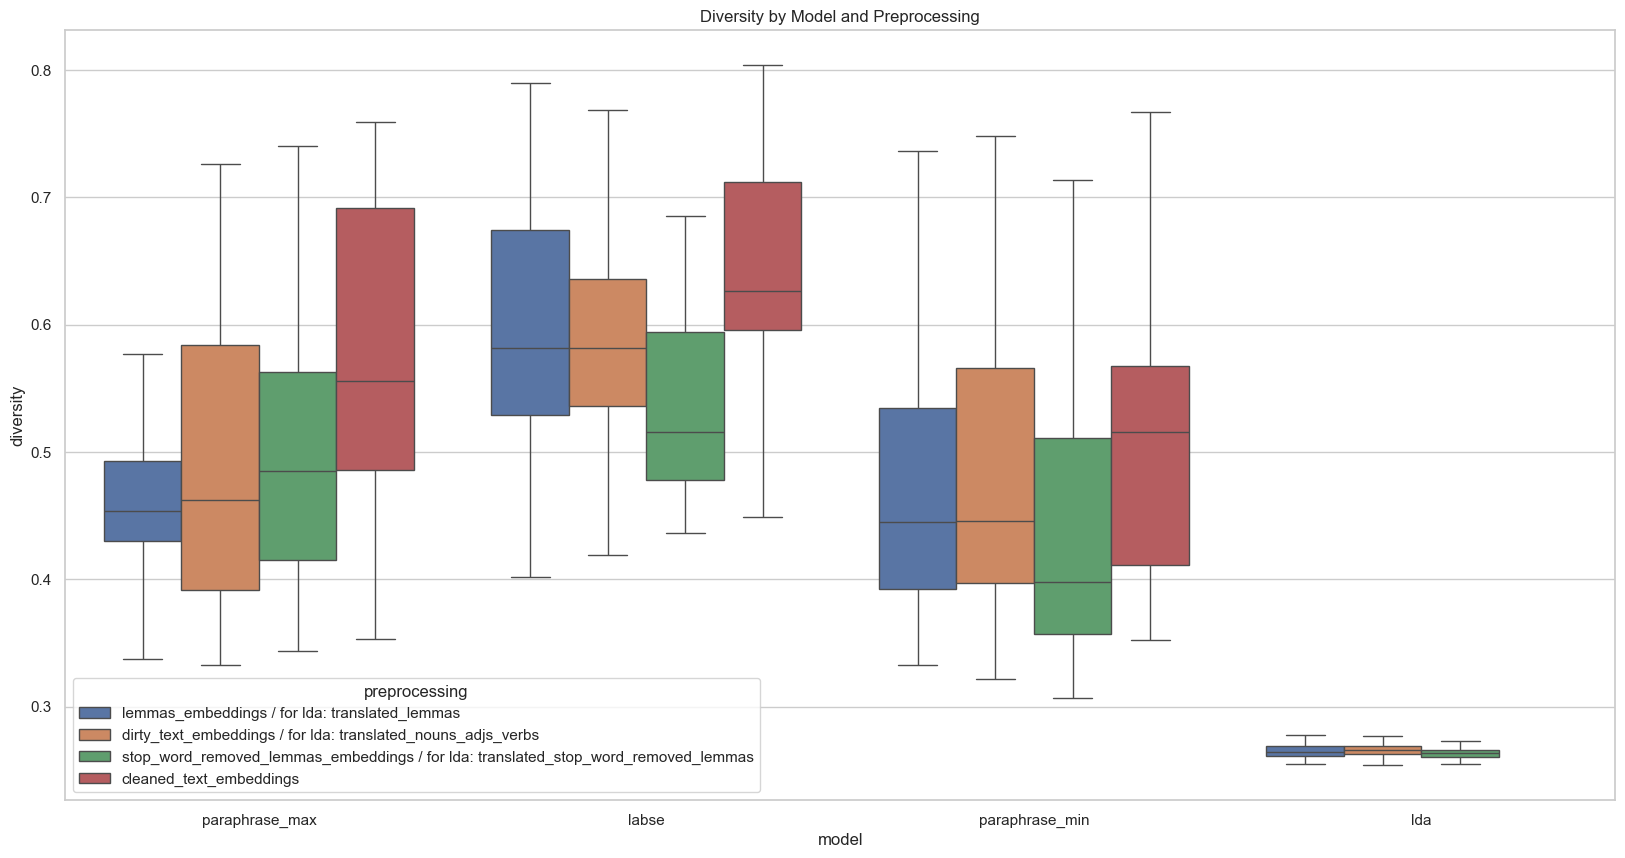

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [20, 10]


sns.set_theme(style="whitegrid")
ax = sns.boxplot(
    data=df.query("eval_space=='translated_stop_word_removed_lemmas'"),
    x="model",
    y="diversity",
    hue="preprocessing",
    showfliers=False,
)


new_labels = [
    " / for lda: translated_lemmas",
    " / for lda: translated_nouns_adjs_verbs",
    " / for lda: translated_stop_word_removed_lemmas",
    "",
]
for t, l in zip(ax.legend_.texts, new_labels):
    t.set_text(t.get_text() + l)

ax.set_title("Diversity by Model and Preprocessing")

plt.savefig(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Graphs/CaseStuy2/diversity.png"
)
plt.savefig(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Graphs/CaseStuy2/diversity.pdf"
)
plt.savefig(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Graphs/CaseStuy2/diversity.svg"
)

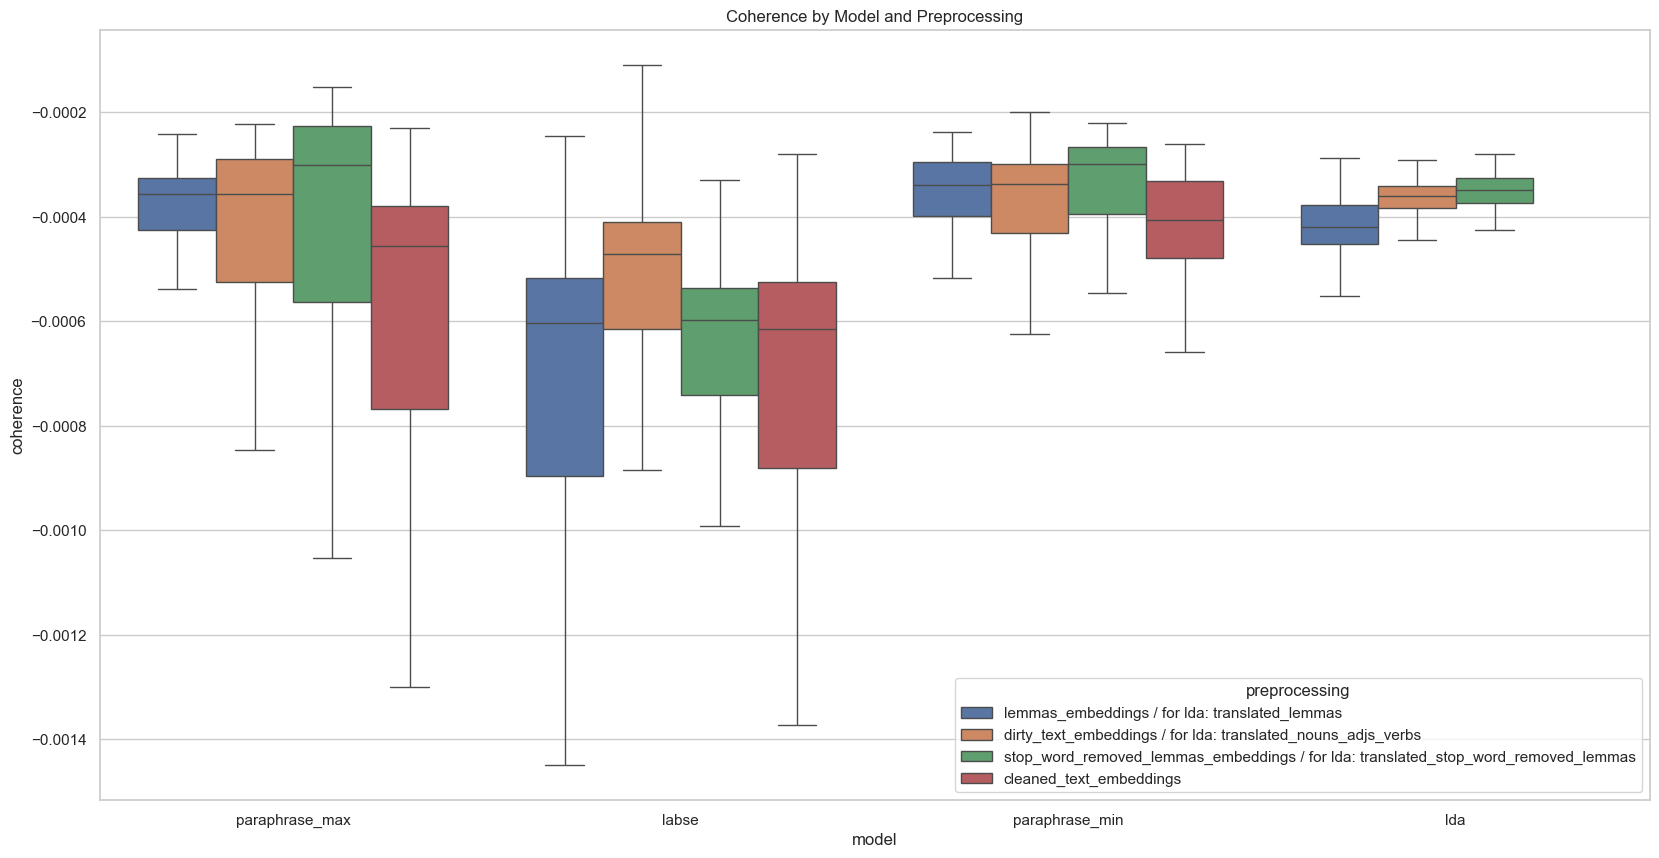

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [20, 10]


sns.set_theme(style="whitegrid")
ax = sns.boxplot(
    data=df.query("eval_space=='translated_stop_word_removed_lemmas'"),
    x="model",
    y="coherence",
    hue="preprocessing",
    showfliers=False,
)


new_labels = [
    " / for lda: translated_lemmas",
    " / for lda: translated_nouns_adjs_verbs",
    " / for lda: translated_stop_word_removed_lemmas",
    "",
]
for t, l in zip(ax.legend_.texts, new_labels):
    t.set_text(t.get_text() + l)

ax.set_title("Coherence by Model and Preprocessing")

plt.savefig(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Graphs/CaseStuy2/coherence.png"
)
plt.savefig(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Graphs/CaseStuy2/coherence.pdf"
)
plt.savefig(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Graphs/CaseStuy2/coherence.svg"
)

In [27]:
df.query("eval_space=='translated_stop_word_removed_lemmas'")["mean_topic_size"].corr(
    df.query("eval_space=='translated_stop_word_removed_lemmas'")["coherence"]
)

-0.8472043229337702

In [33]:
df.query("eval_space=='translated_stop_word_removed_lemmas'")["nr_topics"].corr(
    df.query("eval_space=='translated_stop_word_removed_lemmas'")["coherence"]
)

0.5028884892201717

In [25]:
df.query("eval_space=='translated_stop_word_removed_lemmas'")["mean_topic_size"].corr(
    df.query("eval_space=='translated_stop_word_removed_lemmas'")["diversity"]
)

0.5148136345213223

In [28]:
df.query("eval_space=='translated_stop_word_removed_lemmas'")["coherence"].corr(
    df.query("eval_space=='translated_stop_word_removed_lemmas'")["diversity"]
)

-0.5298722107249083

In [29]:
df

,Unnamed: 0.1,Unnamed: 0,mean_topic_size,std_topic_size,outlier_freq,nr_topics,Topic_Size_0.0_Quantil,Topic_Size_0.25_Quantil,Topic_Size_0.5_Quantil,Topic_Size_0.75_Quantil,coherence,diversity,eval_space,model,preprocessing
0,0,0,94.311111,325.964587,0.566939,225,10.0,20.00,37.0,85.0,-0.000255,0.324558,translated_nouns_adjs_verbs,paraphrase_max,lemmas_embeddings
1,1,1,94.311111,325.964587,0.566939,225,10.0,20.00,37.0,85.0,-0.001005,0.550885,nouns_adjs_verbs,paraphrase_max,lemmas_embeddings
2,2,2,94.311111,325.964587,0.566939,225,10.0,20.00,37.0,85.0,-0.000270,0.337279,translated_stop_word_removed_lemmas,paraphrase_max,lemmas_embeddings
3,3,3,94.311111,325.964587,0.566939,225,10.0,20.00,37.0,85.0,-0.001046,0.566814,stop_word_removed_lemmas,paraphrase_max,lemmas_embeddings
4,4,4,185.105263,1327.564797,0.569347,114,10.0,17.00,31.0,56.0,-0.000399,0.448261,translated_nouns_adjs_verbs,paraphrase_max,lemmas_embeddings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,395,395,1167.764706,4681.187944,0.594857,17,10.0,13.00,21.0,40.0,-0.013246,0.776389,stop_word_removed_lemmas,labse,lemmas_embeddings
4796,396,396,723.550000,3124.281382,0.704673,20,10.0,12.75,23.5,33.5,-0.001403,0.783333,translated_nouns_adjs_verbs,labse,lemmas_embeddings
4797,397,397,723.550000,3124.281382,0.704673,20,10.0,12.75,23.5,33.5,-0.012435,0.833333,nouns_adjs_verbs,labse,lemmas_embeddings
4798,398,398,723.550000,3124.281382,0.704673,20,10.0,12.75,23.5,33.5,-0.001305,0.783333,translated_stop_word_removed_lemmas,labse,lemmas_embeddings


In [32]:
df.query("eval_space=='translated_stop_word_removed_lemmas'")["coherence"].corr(
    df.query("eval_space=='translated_stop_word_removed_lemmas'")["outlier_freq"]
)

-0.08520444009153284

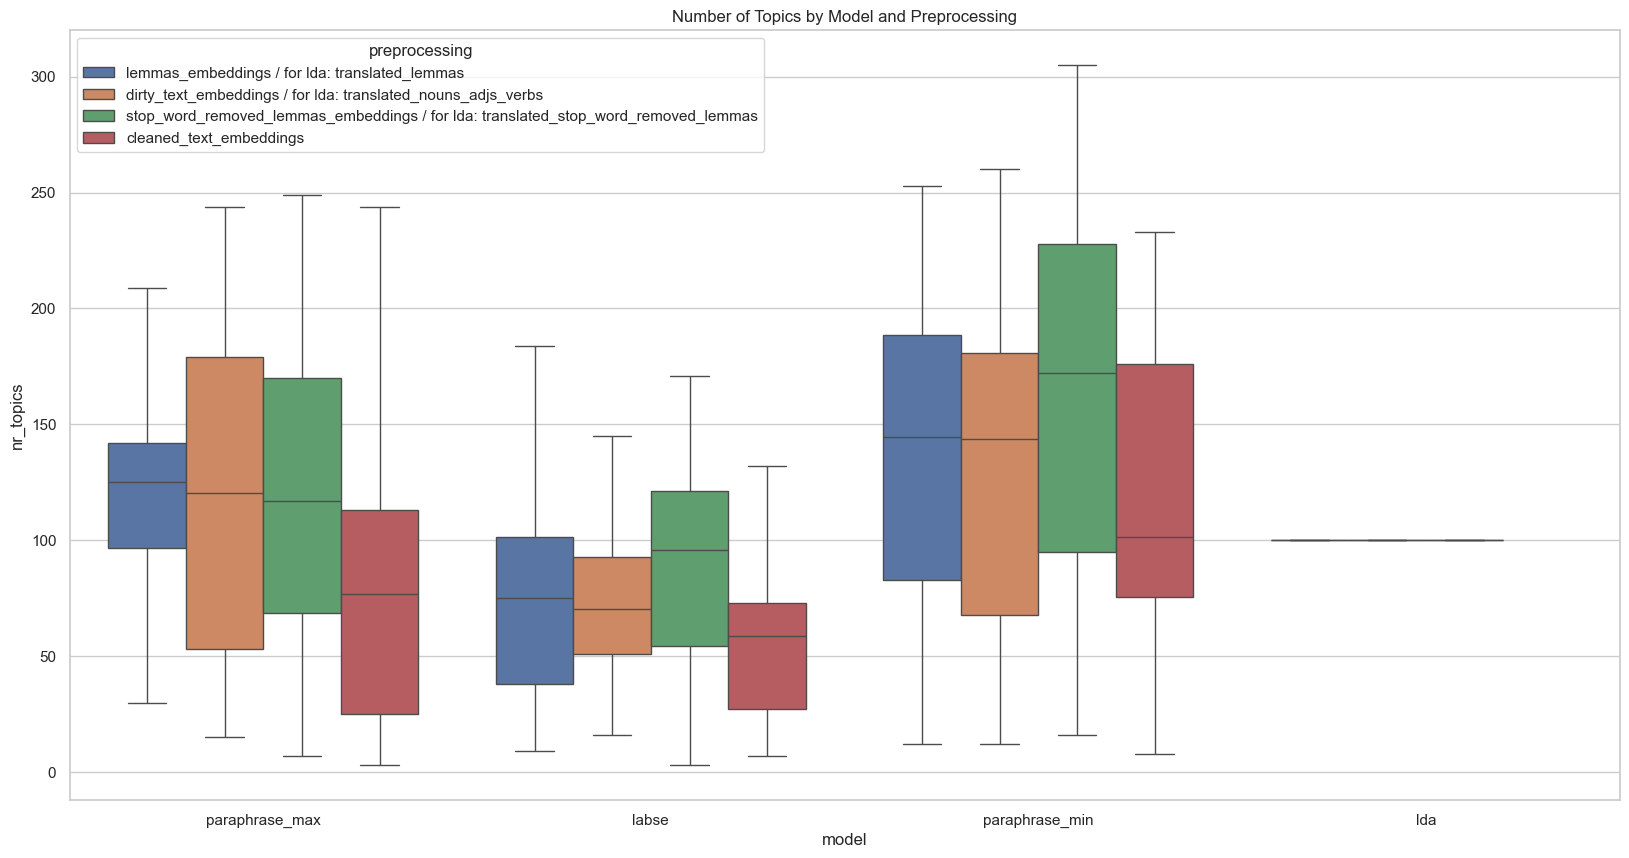

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [20, 10]


sns.set_theme(style="whitegrid")
ax = sns.boxplot(
    data=df.query("eval_space=='translated_stop_word_removed_lemmas'"),
    x="model",
    y="nr_topics",
    hue="preprocessing",
    showfliers=False,
)


new_labels = [
    " / for lda: translated_lemmas",
    " / for lda: translated_nouns_adjs_verbs",
    " / for lda: translated_stop_word_removed_lemmas",
    "",
]
for t, l in zip(ax.legend_.texts, new_labels):
    t.set_text(t.get_text() + l)

ax.set_title("Number of Topics by Model and Preprocessing")

plt.savefig(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Graphs/CaseStuy2/nr_topics.png"
)
plt.savefig(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Graphs/CaseStuy2/nr_topics.pdf"
)
plt.savefig(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Graphs/CaseStuy2/nr_topics.svg"
)

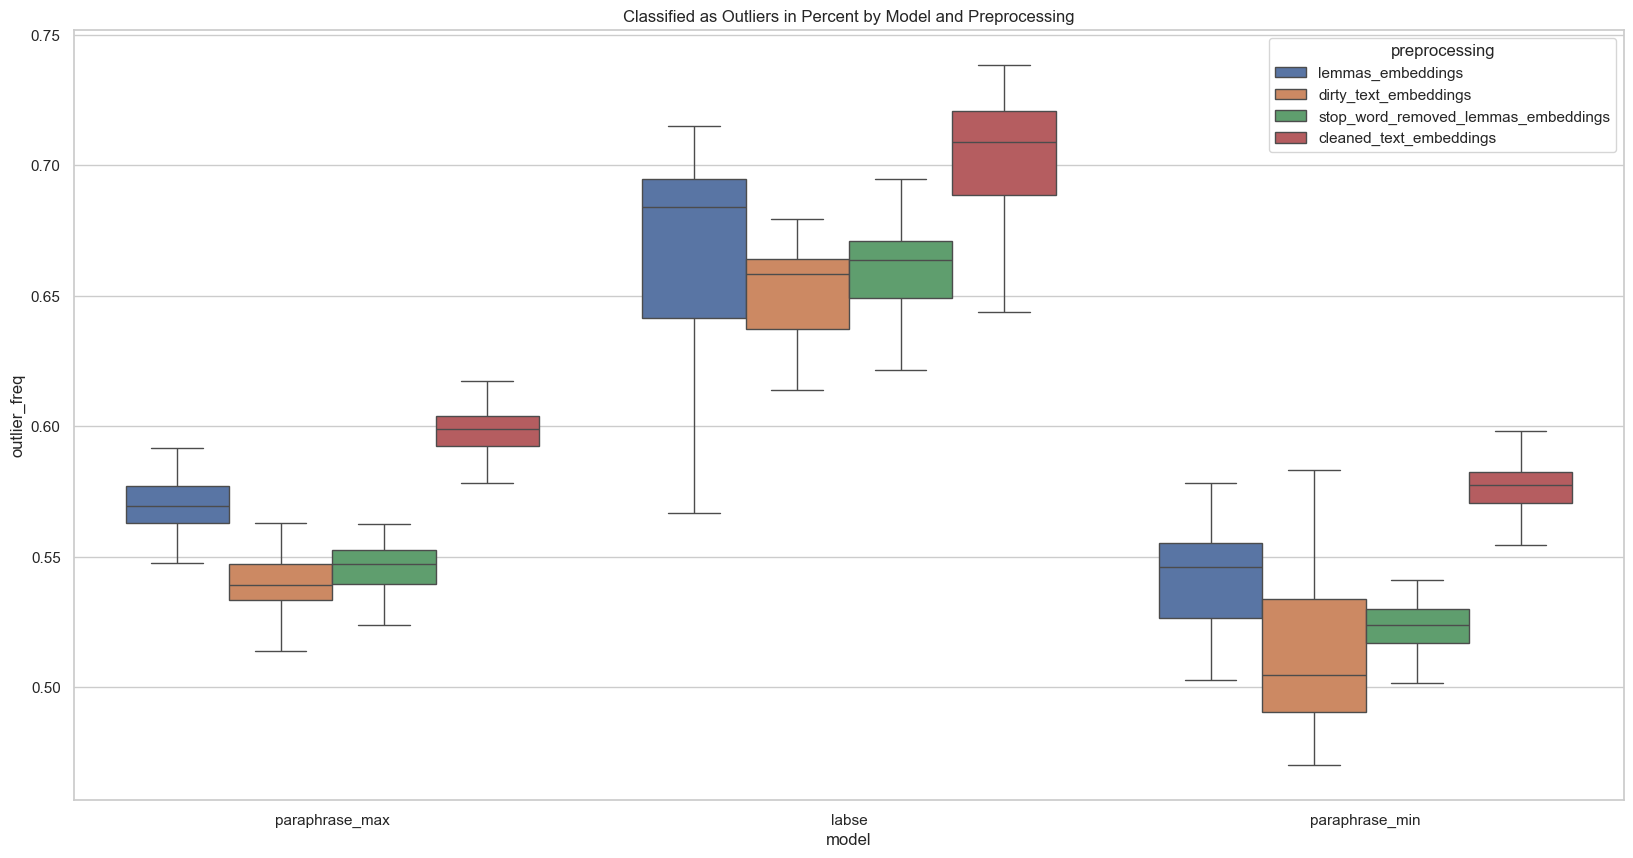

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [20, 10]


sns.set_theme(style="whitegrid")
ax = sns.boxplot(
    data=df.query("eval_space=='translated_stop_word_removed_lemmas'").query(
        "model!='lda'"
    ),
    x="model",
    y="outlier_freq",
    hue="preprocessing",
    showfliers=False,
)

ax.set_title("Classified as Outliers in Percent by Model and Preprocessing")

plt.savefig("/Users/robinfeldmann/TopicAnalysisRUWTweets/Graphs/CaseStuy2/outliers.png")
plt.savefig("/Users/robinfeldmann/TopicAnalysisRUWTweets/Graphs/CaseStuy2/outliers.pdf")
plt.savefig("/Users/robinfeldmann/TopicAnalysisRUWTweets/Graphs/CaseStuy2/outliers.svg")

<Axes: xlabel='nr_topics', ylabel='coherence'>

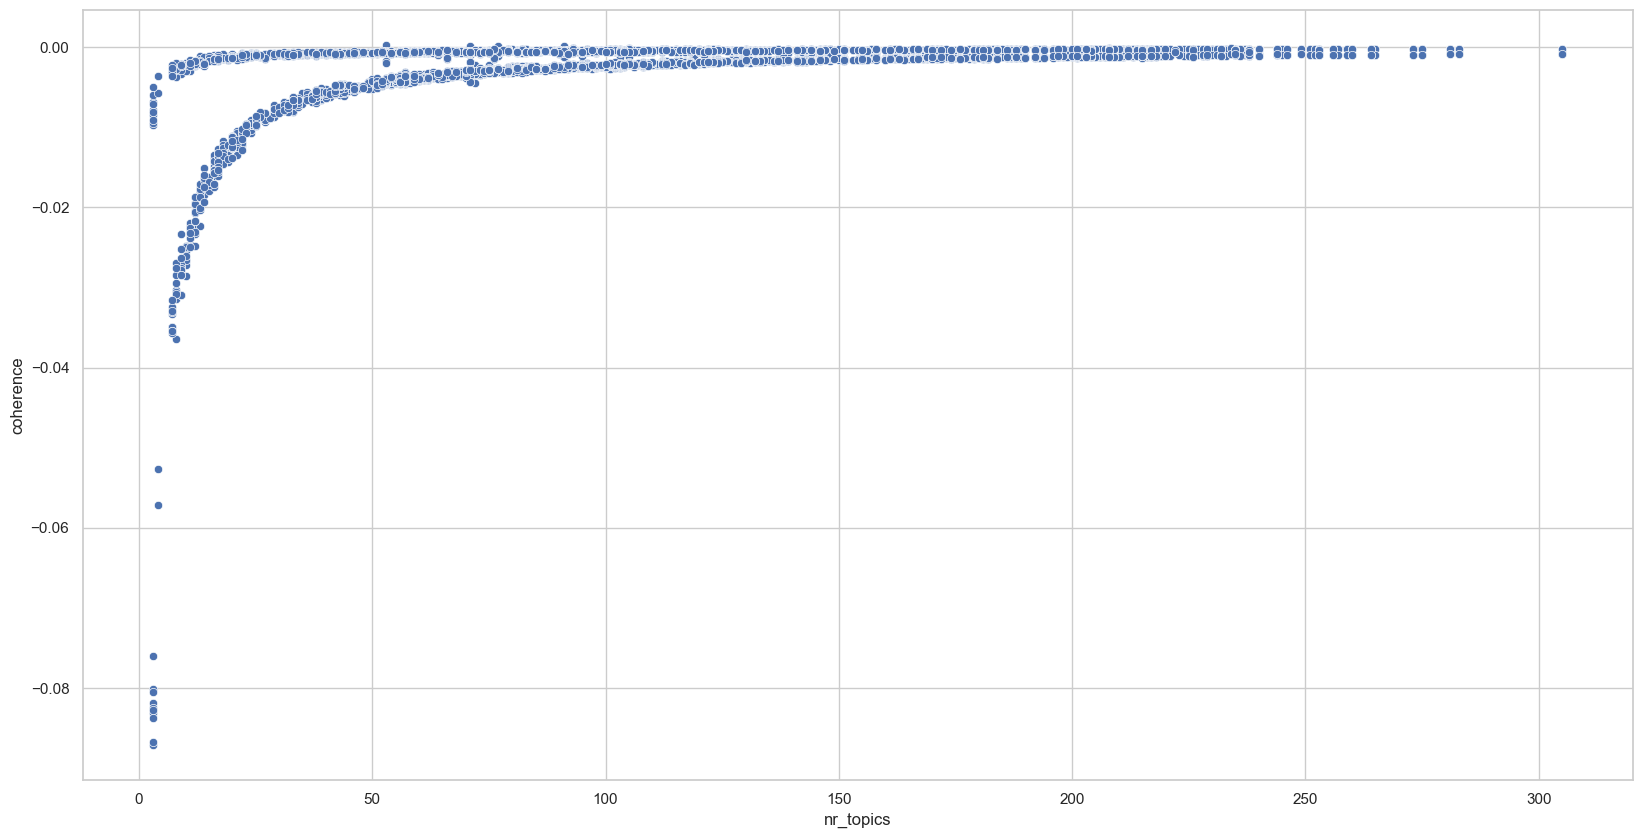

In [38]:
sns.scatterplot(data=df, x="nr_topics", y="coherence")

<Axes: xlabel='nr_topics', ylabel='diversity'>

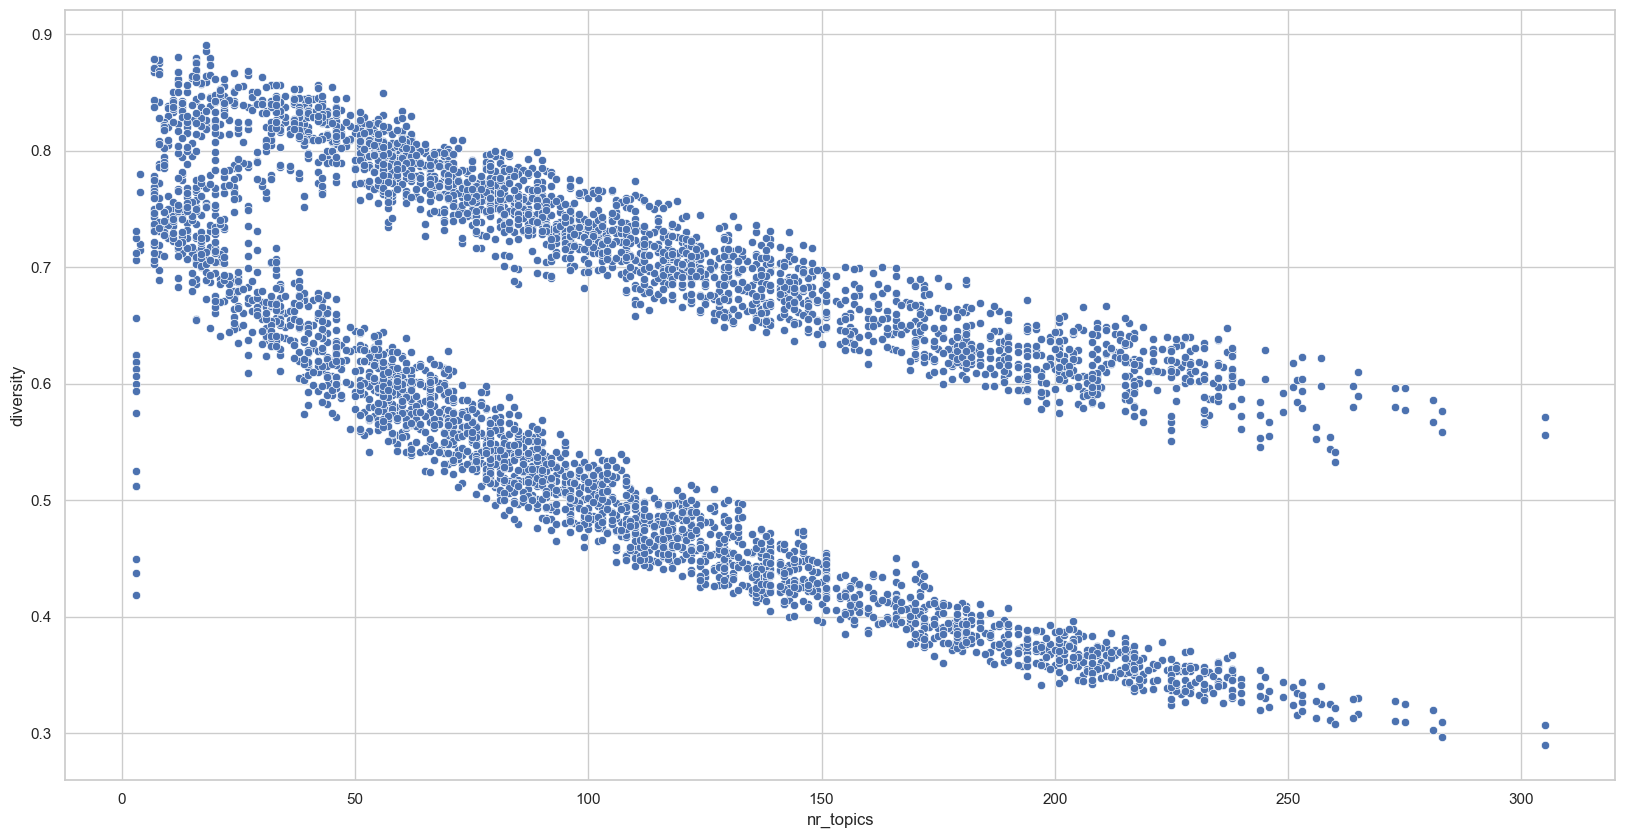

In [39]:
sns.scatterplot(data=df, x="nr_topics", y="diversity")

In [1]:
import pandas as pd


df = pd.read_csv("/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Lemmas/it.csv")

In [2]:
df.columns

Index(['Unnamed: 0', 'tweetid', 'tweetcreatedts', 'lemmas', 'adjs_verbs',
       'nouns', 'entities', 'emojis'],
      dtype='object')